In [1]:
from pandas import read_csv, concat
import numpy as np
import matplotlib.pylab as plt
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
X = read_csv("D:\\GitHub\\Titanic-Machine-Learning-from-Disaster\\data\\factors\\x_train.csv")
Y = read_csv("D:\\GitHub\\Titanic-Machine-Learning-from-Disaster\\data\\factors\\y_train.csv")
data = concat([Y, X], axis=1)

train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
X_train=train[train.columns[1:]]
Y_train=train[train.columns[:1]]
X_test=test[test.columns[1:]]
Y_test=test[test.columns[:1]]

In [28]:
models = (('Log regression',  LogisticRegression()),
          ('Radial SVM',  SVC(kernel='rbf',C=1,gamma=0.1)),
          ('Linear SVM',  SVC(kernel='linear', C=1, gamma=0.1)),
          ('Decision tree',  DecisionTreeClassifier()),
          ('K nearest',  KNeighborsClassifier(n_neighbors=5)),
          ('Naive Bayesian',  GaussianNB()),
          ('Random forest',  RandomForestClassifier(n_estimators=100)),
          ('Perceptron',  MLPClassifier(solver='lbfgs', hidden_layer_sizes=(18,))),
          ('Wide net',  MLPClassifier(solver='lbfgs', hidden_layer_sizes=(90,))),
          ('Deep net',  MLPClassifier(solver='lbfgs', hidden_layer_sizes=(18,18,18,18))),
         )

In [29]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
import pandas as pd

kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts

accuracy=[]
std=[]
for name, model in models:
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    accuracy.append(cv_result.mean())
    std.append(cv_result.std())
new_models_dataframe2=pd.DataFrame({'CV Mean':accuracy,'Std':std},index=[name for name, model in models])
new_models_dataframe2

,CV Mean,Std
Log regression,0.821536,0.037808
Radial SVM,0.730687,0.037535
Linear SVM,0.824919,0.037985
Decision tree,0.776692,0.046242
K nearest,0.729588,0.033154
Naive Bayesian,0.793521,0.031628
Random forest,0.812634,0.050194
Perceptron,0.812584,0.031303
Wide net,0.812609,0.042738
Deep net,0.820462,0.041554


In [9]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=LogisticRegression(),random_state=0,n_estimators=700)
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged LG is:',metrics.accuracy_score(prediction,Y_test))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged LR is:',result.mean())

The accuracy for bagged LG is: 0.817164179104


The cross validated score for bagged LR is: 0.820408296448


In [10]:
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier(base_estimator=SVC(kernel='linear'))
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy for bagged SVC is:',metrics.accuracy_score(prediction,Y_test))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged SVC is:',result.mean())

The accuracy for bagged SVC is: 0.817164179104


KeyboardInterrupt: 

In [11]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.812667971853


In [12]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.827136533878


In [13]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',SVC(kernel='linear',probability=True))
                                             ],
                       voting='soft').fit(X_train,Y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,Y_test))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.828358208955


The cross validated score is 0.818211043014


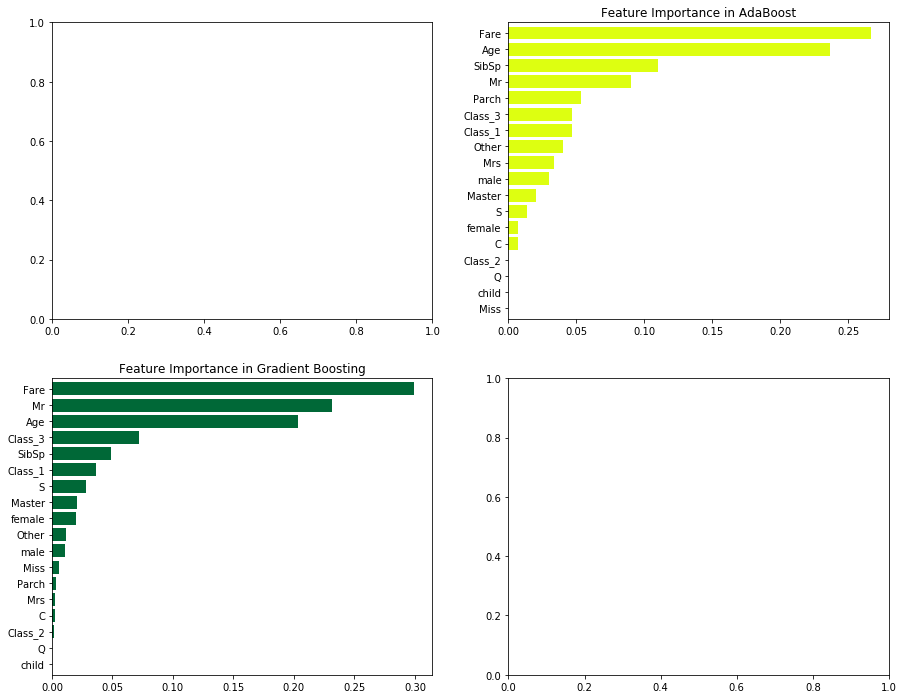

In [34]:
f,ax=plt.subplots(2,2,figsize=(15,12))

# model=LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
#           verbose=0, warm_start=False)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
# ax[0,0].set_title('Feature Importance in Logistic regression')

model=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=300, random_state=None)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

# model=SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
#   decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
#   max_iter=-1, probability=False, random_state=None, shrinking=True,
#   tol=0.001, verbose=False)
# model.fit(X,Y)
# pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
# ax[1,1].set_title('Feature Importance in SVC')

plt.show()